In [92]:
import os
from datetime import datetime
import argparse
from msprime_models import * 
# from abinitio_tm import scaled_time_intervals
# from msprime_utils import scaled_time_intervals, get_het, round_coal_times, tm_counts, get_coal_data, round_bin_coal_data, normalise
from msprime_utils import *
from heatmaps_generate import *
from vcf_mhs import *
import numpy as np
import pdb
import math
import pandas as pd
from scipy.stats import entropy
import argparse
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np


In [2]:
# pecify the paramaters you want. Defaults as below

parser = argparse.ArgumentParser()
parser.add_argument("model",help="Specify the model to be used, as defined in msprime_models.")
parser.add_argument("-N","--N_0",help="Initial population size (Default is 1e+04",default=1e+04,type=int)
parser.add_argument("-L","--seq_length",help="Length of the sequence to be simulated (default 3e+07)",default=int(3e+07),type=int)
parser.add_argument("-mig","--migration_prop",help="Proportion of migrating population (default 0.3)",default=0.3,type=float)
parser.add_argument("-t","--time_splits",nargs=2,help="Time of splits, in generations (default t_1 = 2e+04, t_2 = 4e+04)",default = [int(2e+04),int(4e+04)])
parser.add_argument("-bin","--bin_length",help="The length (in bases) of the how wide you want each bin. (Default is 100)",default=100,type=int)
parser.add_argument("-o_coaldir","--output_coaldir",help="Output directory of coalescent data",default=os.getcwd() + '/coal_data/',type=str)
parser.add_argument("-o_coalname","--output_coalname",help="Output name for coal_data filename",default='',type=str)
parser.add_argument("-o_mhsdir","--output_mhsdir",help="Output dir for vcf and mhs data",default=os.getcwd() + '/vcf_mhs/',type=str)
parser.add_argument("-o_mhsname","--output_mhsname",help="Output name for vcf and mhs data",default = '',type=str)
parser.add_argument("-rho","--recomb_rate",help="Rate of recombination per bp per generation",default=2e-08,type=float)
parser.add_argument("-mew","--mut_rate",help="Rate of mutation per bp per generation",default=2e-08,type=float)
parser.add_argument("--suffix_time",help="Boolean, whether to write the time in to the files (useful for multi runs of the same simulation",action="store_true")
parser.add_argument("--print",help="Print the DemographicDebugger (from msprime) and the number of segratating sites",action="store_true")
parser.add_argument("--tree",help="Draw trees and info per segment",action="store_true")
args = parser.parse_args("m0001".split())

In [3]:
# scaled_time_intervals 

mu = 2e-08
alpha = 0.1
N_0 = 10000 # TODO, use sim
Tmax = 15
N_T = 50
T = [0]
for i in range(0,N_T): # TODO: should T have upper interval
        T.append( alpha*math.exp( (i/N_T)*math.log(1 + Tmax/alpha) - 1))
T_np = np.array(T) # convert to numpy
# scale these to generations with *2*N_0, as per Schiffels' instruction
T_scaled_np = T_np * 2 * N_0

## Mig01

History where 0.1 of lineages migrate to another population at time T_1, then return back at time T_2.

In [4]:
path_mig01 =  '/home/trevor/ancestry/coal_data/mig01/'
files_mig01 = os.listdir(path_mig01)
print('Files are:\m')
for i in range(len(files_mig01)):
    print(f'File {i} is {path_mig01 + files_mig01[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig01_tms = np.zeros(shape=(N_T,N_T))



Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_093903.txt
File 1 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094150.txt
File 2 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094432.txt
File 3 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094722.txt
File 4 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095007.txt
File 5 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095250.txt
File 6 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095527.txt
File 7 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095814.txt
File 8 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_100053.txt
File 9 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_100332.txt
File 10 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_s

In [5]:
for i in range(len(files_mig01)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_mig01),files_mig01[i]))
    coal_data = np.loadtxt(path_mig01+files_mig01[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig01_tms = mig01_tms + tm
    print(f'sum of mig01_tms is {sum(mig01_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

on iteration 0 of 19; file is 20201127_instant_struct0001_mig1_093903.txt
sum of mig01_tms is [40962.  4682.  6386.  5156.  6653.  7315.  7492.  7589.  8426. 11186.
 15213. 13860. 17944. 18153. 21473. 18590. 24257. 21093. 26141. 30073.
 28848. 33305. 37389. 37115. 38743. 42542. 45642. 49584. 51746. 53776.
 51867. 53174. 55092. 56801. 48312. 45389. 44841. 41753. 41556. 36048.
 37763. 48748. 43407. 37773. 31998. 26502. 20383. 16131. 11102. 20025.]
on iteration 1 of 19; file is 20201127_instant_struct0001_mig1_094150.txt
sum of mig01_tms is [ 79766.   7806.  11558.  10122.  14337.  13013.  12683.  19410.  21625.
  23421.  24476.  28463.  36935.  33456.  39681.  40900.  46260.  44869.
  52894.  57253.  57848.  70982.  71306.  75924.  79384.  85752.  90860.
  95562.  99813. 107472. 105418. 111153. 111272. 112625.  96670.  90423.
  89425.  84823.  81724.  73249.  75404.  99227.  86948.  75297.  64420.
  52600.  40866.  31127.  22468.  41028.]
on iteration 2 of 19; file is 20201127_instant_st

sum of mig01_tms is [916004.  93857. 105235. 127999. 134370. 135524. 164762. 181581. 196481.
 206508. 229097. 254005. 288790. 296184. 335814. 369591. 402226. 435521.
 462240. 503954. 542042. 589419. 622624. 681791. 709046. 765319. 819607.
 844541. 877980. 915694. 944132. 979885. 986447. 989557. 877138. 816779.
 789658. 753551. 723030. 671469. 678907. 879287. 786837. 668853. 568870.
 459091. 364261. 277771. 205570. 371083.]
on iteration 18 of 19; file is 20201127_instant_struct0001_mig1_102724.txt
sum of mig01_tms is [ 968388.  103724.  110935.  133034.  139476.  143384.  177159.  194809.
  206381.  218373.  240372.  267495.  304206.  314971.  353126.  393345.
  422276.  458530.  486624.  530488.  569097.  624764.  656474.  716296.
  748694.  809622.  864588.  890299.  928691.  968129.  998738. 1033080.
 1042957. 1044514.  923867.  862468.  836870.  795284.  762620.  707077.
  716842.  926694.  830982.  705620.  599386.  484897.  383801.  292750.
  216699.  391085.]


/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


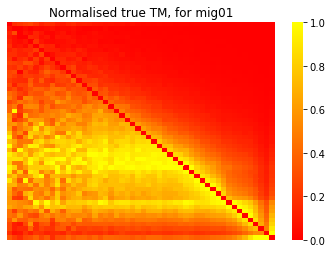

In [17]:
tm_norm_mig01 = normalise(mig01_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig01 = np.copy(tm_norm_mig01)
tm_nd_mig01[range(0,len(tm_nd_mig01)),range(0,len(tm_nd_mig01))] = 0
tm_nd_norm_mig01 = normalise(tm_nd_mig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig01,'colmax'),title='Normalised true TM, for mig01') # show heatmap

## Matching_mig01

History with genuine population size changes, where the coalescent rate matches the mig01 history (as detected by PSMC)

In [8]:
path_matchingmig01 =  '/home/trevor/ancestry/coal_data/matching_mig01/'
files_matchingmig01 = os.listdir(path_matchingmig01)
print('Files are:\m')
for i in range(len(files_matchingmig01)):
    print(f'File {i} is {path_matchingmig01 + files_matchingmig01[i]}')
seq_length = 150e+06 # length of sequence used for simulations
matchingmig01_tms = np.zeros(shape=(N_T,N_T))

# for i in range(len(files_matchingmig01)):
#     print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig01),files_matchingmig01[i]))
#     test = np.loadtxt(path_matchingmig01+files_matchingmig01[i],comments="#")
#     coal_times = round_bin_coal_data(seq_length,test, args)
#     coal_times_interval= round_coal_times(coal_times,T_scaled_np,N_T)
#     tm = tm_counts(coal_times_intervals,N_T=N_T)
#     matchingmig01_tms = matchingmig01_tms + tm
for i in range(len(files_matchingmig01)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig01),files_matchingmig01[i]))
    coal_data = np.loadtxt(path_matchingmig01+files_matchingmig01[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    matchingmig01_tms = matchingmig01_tms + tm
    print(f'sum of mig01_tms is {sum(mig01_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals


Files are:\m
File 0 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095210.txt
File 1 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095435.txt
File 2 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095650.txt
File 3 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095905.txt
File 4 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100121.txt
File 5 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100336.txt
File 6 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100556.txt
File 7 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100814.txt
File 8 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101035.txt
File 9 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101253.txt
File 10 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101512.txt
File 11 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_

sum of mig01_tms is [ 968388.  103724.  110935.  133034.  139476.  143384.  177159.  194809.
  206381.  218373.  240372.  267495.  304206.  314971.  353126.  393345.
  422276.  458530.  486624.  530488.  569097.  624764.  656474.  716296.
  748694.  809622.  864588.  890299.  928691.  968129.  998738. 1033080.
 1042957. 1044514.  923867.  862468.  836870.  795284.  762620.  707077.
  716842.  926694.  830982.  705620.  599386.  484897.  383801.  292750.
  216699.  391085.]
on iteration 12 of 31; file is matching_mig01_120807.txt
sum of mig01_tms is [ 968388.  103724.  110935.  133034.  139476.  143384.  177159.  194809.
  206381.  218373.  240372.  267495.  304206.  314971.  353126.  393345.
  422276.  458530.  486624.  530488.  569097.  624764.  656474.  716296.
  748694.  809622.  864588.  890299.  928691.  968129.  998738. 1033080.
 1042957. 1044514.  923867.  862468.  836870.  795284.  762620.  707077.
  716842.  926694.  830982.  705620.  599386.  484897.  383801.  292750.
  21669

sum of mig01_tms is [ 968388.  103724.  110935.  133034.  139476.  143384.  177159.  194809.
  206381.  218373.  240372.  267495.  304206.  314971.  353126.  393345.
  422276.  458530.  486624.  530488.  569097.  624764.  656474.  716296.
  748694.  809622.  864588.  890299.  928691.  968129.  998738. 1033080.
 1042957. 1044514.  923867.  862468.  836870.  795284.  762620.  707077.
  716842.  926694.  830982.  705620.  599386.  484897.  383801.  292750.
  216699.  391085.]
on iteration 28 of 31; file is matching_mig01_213752.txt
sum of mig01_tms is [ 968388.  103724.  110935.  133034.  139476.  143384.  177159.  194809.
  206381.  218373.  240372.  267495.  304206.  314971.  353126.  393345.
  422276.  458530.  486624.  530488.  569097.  624764.  656474.  716296.
  748694.  809622.  864588.  890299.  928691.  968129.  998738. 1033080.
 1042957. 1044514.  923867.  862468.  836870.  795284.  762620.  707077.
  716842.  926694.  830982.  705620.  599386.  484897.  383801.  292750.
  21669

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


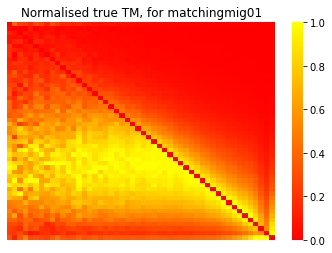

In [18]:
tm_norm_mmig01 = normalise(matchingmig01_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig01 = np.copy(tm_norm_mmig01)
tm_nd_mmig01[range(0,len(tm_nd_mmig01)),range(0,len(tm_nd_mmig01))] = 0
tm_nd_norm_mmig01 = normalise(tm_nd_mmig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig01,'colmax'),title='Normalised true TM, for matchingmig01') # show heatmap
# heatmaps_seq(normalise(,'colmax'),title='Normalised true TM') # show heatmap


## Comparison for mig01 and matchingmig01

Compare the two

example values from the 20th column of this block are: [0.00024178 0.00380971 0.00713199 0.00627596 0.0050009  0.00305979
 0.00102475 0.0030395 ]
These correspond to the following values from the time intervals: [18250.75184418 20177.17213123 22306.93171926 24661.49366677
 27264.58652092 30142.4434465  33324.06659564 36841.5193825 ]


/home/trevor/miniconda3/envs/ancestry/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


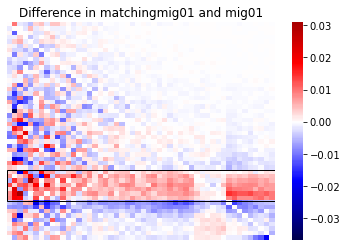

In [74]:
def heatmaps_div2(matrix,title=''):
    cmaps = OrderedDict()
    cmaps['Diverging'] = [
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = sns.heatmap(matrix, cmap=cmaps['Diverging'][11], center=0,yticklabels=False, xticklabels=False)
    ax1.set_title(title)
    ax1.add_patch(Rectangle((0, 34), 50, 7, fill=False, edgecolor='black', lw=1))
    # for i in range(len(matrix)):
    #     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    # ax.set_title(plot_title)
    # ax.set_ylabel(ylabel='PSMC output')
    fig.show()
    # fig.savefig(heatmaps_path + sys.argv[4])
    return None

diff_mig01 = tm_nd_norm_mmig01 - tm_nd_norm_mig01
fig = heatmaps_div2(diff_mig01,title='Difference in matchingmig01 and mig01')
print(f'example values from the 20th column of this block are: {diff_mig01[33:41,20]}')
print(f'These correspond to the following values from the time intervals: {T_scaled_np[33:41]}') # this corresponds with the times at which structure occured


In [151]:
KL_divergence_mig01 = []
for i in range(N_T):
    KL_div = entropy(tm_nd_norm_mmig01[:,i],tm_nd_norm_mig01[:,i])
    KL_divergence_mig01.append(KL_div)

print(KL_divergence)
print('\nmean KL_divergence is {}'.format(np.mean(np.array(KL_divergence))))
print('\nmedian KL_divergence is {}'.format(np.median(np.array(KL_divergence))))

[0.026642613354806728, 0.14496029858931267, 0.13569346705517984, 0.07826390235966066, 0.06124454809851624, 0.058969940476815426, 0.04640120918057433, 0.0657394261411999, 0.04143573966730855, 0.028907115681344478, 0.037713443850380335, 0.018965791115104127, 0.02185193385760853, 0.014485872513976436, 0.014882668270709333, 0.013595095036296866, 0.010560157057973293, 0.009286526619910042, 0.00866831170718596, 0.0077230780122236956, 0.00846094953931288, 0.006230766023183575, 0.0083480470627642, 0.007703196548522856, 0.005105171851609721, 0.005263188449481588, 0.006665645534417522, 0.007510178703166599, 0.0057460131311351925, 0.005717776131462038, 0.00851217639711091, 0.006824094530204669, 0.006954055937937051, 0.007974164645585941, 0.00508750171691712, 0.002203967044277692, 0.001923136664014268, 0.0011499411188274924, 0.0013385798410011419, 0.0017739538562963157, 0.0019909033083322925, 0.009124248700167462, 0.008268571821781881, 0.007950280636595308, 0.008062726292969093, 0.0090998335686106

In [106]:
i = 2
entropy(tm_nd_norm_mig01[:,i],tm_nd_norm_mmig01[:,i])
test = entropy(tm_nd_norm_mmig01[:,i],tm_nd_norm_mig01[:,i])
np.isinf(test)

True

## Mig02 and Matchingmig01


Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_130519.txt
File 1 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_130744.txt
File 2 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_131017.txt
File 3 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_131243.txt
File 4 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_131510.txt
File 5 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_131738.txt
File 6 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_131945.txt
File 7 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_132207.txt
File 8 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_132437.txt
File 9 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_struct0001_mig2_132706.txt
File 10 is /home/trevor/ancestry/coal_data/mig02/20201127_instant_s

sum of mig02_tms is [898989.  70354.  84668.  87847. 104801. 110835. 126335. 141597. 148835.
 166779. 171902. 208879. 211673. 238170. 267068. 273077. 303029. 338038.
 356269. 383205. 415439. 460495. 483250. 511950. 545324. 584385. 626315.
 654199. 682086. 704653. 744330. 745912. 759131. 762974. 615414. 563646.
 525090. 483577. 448104. 410614. 467029. 789178. 702215. 598855. 512605.
 416775. 326229. 247259. 181570. 339033.]
on iteration 14 of 20; file is 20201127_instant_struct0001_mig2_133920.txt
sum of mig02_tms is [968539.  77295.  91311.  95450. 110563. 120793. 135197. 151864. 159595.
 179619. 184224. 223286. 224700. 255371. 283091. 295302. 322517. 361389.
 382125. 409710. 443063. 494158. 516265. 550620. 586563. 621896. 668509.
 698811. 734925. 755244. 793876. 802465. 818941. 819985. 657960. 602846.
 559825. 518079. 478303. 439498. 498115. 845386. 753251. 642214. 549514.
 445109. 348762. 265284. 194494. 364083.]
on iteration 15 of 20; file is 20201127_instant_struct0001_mig2_134142.

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


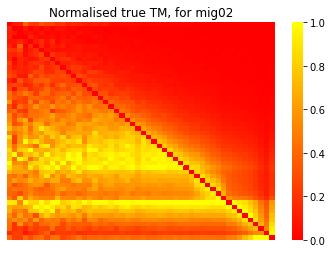

In [120]:
path_mig02 =  '/home/trevor/ancestry/coal_data/mig02/'
files_mig02 = os.listdir(path_mig02)
print('Files are:\m')
for i in range(len(files_mig02)):
    print(f'File {i} is {path_mig02 + files_mig02[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig02_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_mig02)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_mig02),files_mig02[i]))
    coal_data = np.loadtxt(path_mig02+files_mig02[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig02_tms = mig02_tms + tm
    print(f'sum of mig02_tms is {sum(mig02_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mig02 = normalise(mig02_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig02 = np.copy(tm_norm_mig02)
tm_nd_mig02[range(0,len(tm_nd_mig02)),range(0,len(tm_nd_mig02))] = 0
tm_nd_norm_mig02 = normalise(tm_nd_mig02,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig02,'colmax'),title='Normalised true TM, for mig02') # show heatmap


Files are:\m
File 0 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_095210.txt
File 1 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_095444.txt
File 2 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_095712.txt
File 3 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_095937.txt
File 4 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_100208.txt
File 5 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_100449.txt
File 6 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_100722.txt
File 7 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_101003.txt
File 8 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_101232.txt
File 9 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_101506.txt
File 10 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_101741.txt
File 11 is /home/trevor/ancestry/coal_data/matching_mig02/matching_mig02_

sum of mmig02_tms is [590842.  60876.  60495.  69184.  75762.  91196.  89352. 105745. 118821.
 117372. 152864. 158564. 165703. 186087. 206475. 231076. 249009. 268881.
 295125. 327031. 373580. 396557. 414469. 458099. 491517. 521576. 550605.
 565376. 598242. 602297. 623510. 621183. 608730. 612575. 596740. 586028.
 559095. 556015. 548679. 533344. 514827. 499738. 466895. 434292. 387826.
 327935. 279404. 214945. 157426. 278023.]
on iteration 12 of 36; file is matching_mig02_102251.txt
sum of mmig02_tms is [639065.  66364.  63234.  73552.  82651.  97644.  96341. 115139. 126565.
 128426. 164861. 171306. 177514. 202380. 225785. 254425. 268166. 291253.
 319921. 353174. 403665. 428985. 449138. 497836. 533801. 563479. 595047.
 613082. 647908. 654316. 675115. 670853. 662831. 661830. 645359. 632750.
 608422. 602533. 595449. 580261. 558248. 540910. 506102. 470793. 418938.
 355287. 303672. 232965. 170736. 301910.]
on iteration 13 of 36; file is matching_mig02_102522.txt
sum of mmig02_tms is [694250. 

sum of mmig02_tms is [1539829.  156495.  150856.  190157.  181065.  208849.  228169.  247152.
  270172.  285793.  350567.  384212.  394102.  450795.  508115.  547556.
  608377.  646355.  712744.  795254.  875324.  960176. 1003244. 1109002.
 1196451. 1257187. 1325635. 1367444. 1443809. 1456961. 1497538. 1493241.
 1470668. 1456065. 1430601. 1403567. 1353579. 1334189. 1317336. 1286531.
 1243579. 1206546. 1130563. 1044008.  939933.  800131.  669221.  515544.
  379723.  675561.]
on iteration 29 of 36; file is matching_mig02_124149.txt
sum of mmig02_tms is [1573088.  162473.  158610.  195333.  189504.  216738.  238026.  257287.
  279816.  296444.  362508.  398981.  413269.  464048.  527506.  562905.
  634164.  671823.  740014.  818490.  903506.  992563. 1040321. 1145580.
 1234945. 1302671. 1367523. 1416150. 1495436. 1507871. 1552913. 1544342.
 1521533. 1509434. 1482420. 1450712. 1399822. 1379902. 1362100. 1330929.
 1285773. 1247709. 1168248. 1080238.  972478.  827236.  691919.  533004.
  393

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


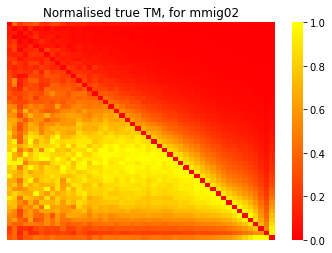

In [121]:
path_matchingmig02 =  '/home/trevor/ancestry/coal_data/matching_mig02/'
files_matchingmig02 = os.listdir(path_matchingmig02)
print('Files are:\m')
for i in range(len(files_matchingmig02)):
    print(f'File {i} is {path_matchingmig02 + files_matchingmig02[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mmig02_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_matchingmig02)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig02),files_matchingmig02[i]))
    coal_data = np.loadtxt(path_matchingmig02+files_matchingmig02[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mmig02_tms = mmig02_tms + tm
    print(f'sum of mmig02_tms is {sum(mmig02_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mmig02 = normalise(mmig02_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig02 = np.copy(tm_norm_mmig02)
tm_nd_mmig02[range(0,len(tm_nd_mmig02)),range(0,len(tm_nd_mmig02))] = 0
tm_nd_norm_mmig02 = normalise(tm_nd_mmig02,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig02,'colmax'),title='Normalised true TM, for mmig02') # show heatmap


example values from the 20th column of this block are: [-0.00773764  0.00340866  0.00823514  0.00501569  0.0089482   0.00725032
  0.00980997  0.01201983]
These correspond to the following values from the time intervals: [18250.75184418 20177.17213123 22306.93171926 24661.49366677
 27264.58652092 30142.4434465  33324.06659564 36841.5193825 ]


mean KL divergence for mig02 and matchingmig02 is 0.021108151585758517
with 4 infs

median KL_divergence is 0.018675319277322893


/home/trevor/miniconda3/envs/ancestry/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


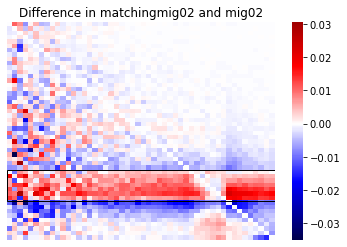

In [177]:
def heatmaps_div2(matrix,title=''):
    cmaps = OrderedDict()
    cmaps['Diverging'] = [
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = sns.heatmap(matrix, cmap=cmaps['Diverging'][11], center=0,yticklabels=False, xticklabels=False)
    ax1.set_title(title)
    ax1.add_patch(Rectangle((0, 34), 50, 7, fill=False, edgecolor='black', lw=1))
    # for i in range(len(matrix)):
    #     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    # ax.set_title(plot_title)
    # ax.set_ylabel(ylabel='PSMC output')
    fig.show()
    # fig.savefig(heatmaps_path + sys.argv[4])
    return None

diff_mig02 = tm_nd_norm_mmig02 - tm_nd_norm_mig02
fig = heatmaps_div2(diff_mig02,title='Difference in matchingmig02 and mig02')
print(f'example values from the 20th column of this block are: {diff_mig02[33:41,20]}')
print(f'These correspond to the following values from the time intervals: {T_scaled_np[33:41]}') # this corresponds with the times at which structure occured

KL_divergence_mig02 = []
for i in range(N_T):
    KL_div = entropy(tm_nd_norm_mmig02[:,i],tm_nd_norm_mig02[:,i])
    KL_divergence_mig02.append(KL_div)

# find out the non inf elements
not_infs = np.where(np.array(KL_divergence_mig02)<1)
# print(not_infs)
print(f'\n\nmean KL divergence for mig02 and matchingmig02 is {np.mean(np.array(KL_divergence_mig02)[not_infs])}')
print(f'with {N_T - len(not_infs[0])} infs')
print('\nmedian KL_divergence is {}'.format(np.median(np.array(KL_divergence_mig02))))

## Mig03 and Matchingmig03

Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_093903.txt
File 1 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_094207.txt
File 2 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_094507.txt
File 3 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_094804.txt
File 4 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_095102.txt
File 5 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_095401.txt
File 6 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_095658.txt
File 7 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_100002.txt
File 8 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_100303.txt
File 9 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_struct0001_mig3_100608.txt
File 10 is /home/trevor/ancestry/coal_data/mig03/20201127_instant_s

sum of mig03_tms is [773844.  76669.  77604.  88419. 103274. 129071. 122245. 144708. 149183.
 162318. 193163. 199216. 226004. 235782. 251967. 288315. 302529. 335778.
 364310. 384503. 415603. 458970. 486552. 522189. 548025. 587864. 626338.
 658222. 692529. 712312. 724441. 755174. 771378. 763689. 577327. 526511.
 473556. 436997. 393673. 352051. 423558. 870661. 761988. 668146. 551751.
 446545. 353429. 270423. 197365. 363817.]
on iteration 14 of 20; file is 20201127_instant_struct0001_mig3_102120.txt
sum of mig03_tms is [831583.  83462.  83295.  94066. 110019. 140839. 129894. 154580. 161477.
 176336. 204080. 211570. 242787. 253659. 272255. 308254. 324446. 359094.
 393795. 410974. 447904. 491397. 521519. 555629. 588553. 631799. 671552.
 704057. 742179. 761397. 777230. 808472. 827774. 817688. 617331. 564532.
 506531. 468457. 422103. 375990. 453556. 930608. 814890. 715313. 590935.
 477523. 377311. 289776. 211271. 390243.]
on iteration 15 of 20; file is 20201127_instant_struct0001_mig3_102418.

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sum of mmig03_tms is [61109.  3720.  4315.  5086.  7842. 10852.  7613. 13770. 11831. 14867.
 14624. 13023. 15499. 13537. 14625. 20181. 21925. 19351. 22807. 25470.
 27611. 33533. 35020. 36895. 39116. 41649. 45640. 43711. 49744. 47198.
 51659. 48081. 48844. 48624. 42394. 44938. 43614. 46190. 42793. 42623.
 42631. 42395. 40789. 40311. 35857. 29095. 26909. 19641. 14711. 25736.]
on iteration 1 of 40; file is matching_mig03_095458.txt
sum of mmig03_tms is [102011.  12024.  10570.  13828.  18523.  17636.  15889.  22403.  21982.
  25689.  25023.  26945.  27805.  27136.  31503.  38248.  42549.  44763.
  47667.  55555.  57922.  66380.  76435.  74016.  80186.  89294.  87724.
  92445.  98760.  96635. 101113.  98818.  98385.  92557.  88066.  89747.
  88273.  90239.  87031.  86143.  85178.  84811.  82420.  78555.  69677.
  58993.  51799.  38714.  29564.  52369.]
on iteration 2 of 40; file is matching_mig03_095730.txt
sum of mmig03_tms is [150457.  18084.  19238.  21129.  26637.  26392.  25653.  3089

sum of mmig03_tms is [998217. 101380. 109605. 123316. 133228. 142658. 160065. 173492. 191784.
 193113. 231713. 241131. 255384. 293324. 333246. 357964. 394568. 419971.
 464520. 511376. 553693. 619902. 660091. 720513. 773045. 826117. 868249.
 896858. 934378. 945844. 958313. 940356. 946387. 911388. 884336. 863157.
 849290. 848862. 836891. 832756. 820341. 810850. 773526. 740446. 662330.
 577952. 481148. 373187. 277682. 482038.]
on iteration 19 of 40; file is matching_mig03_104414.txt
sum of mmig03_tms is [1057333.  108285.  116443.  129435.  142888.  148372.  167004.  183550.
  206468.  201800.  243791.  252934.  270441.  309621.  348434.  375923.
  412135.  442512.  484968.  541151.  584377.  651504.  693283.  757352.
  813116.  870083.  914622.  944594.  980977.  993078. 1004729.  988539.
  996921.  960701.  930756.  907719.  894799.  892915.  882100.  877381.
  863430.  854664.  814151.  779442.  697940.  607184.  507183.  392558.
  292852.  507542.]
on iteration 20 of 40; file is match

sum of mmig03_tms is [1863146.  178454.  190323.  216661.  258903.  257443.  307222.  313338.
  353654.  365989.  427711.  437789.  488128.  540403.  591109.  662046.
  707108.  760832.  851532.  943270. 1021648. 1140491. 1229945. 1326466.
 1437957. 1533870. 1606465. 1651644. 1720336. 1734645. 1768474. 1724890.
 1745612. 1667654. 1642483. 1597401. 1568833. 1557245. 1541701. 1532426.
 1514499. 1492409. 1416619. 1364844. 1219506. 1059403.  884796.  687195.
  512135.  883312.]
on iteration 35 of 40; file is matching_mig03_125032.txt
sum of mmig03_tms is [1890834.  183854.  195416.  221813.  267813.  267234.  314884.  324411.
  364502.  379918.  435917.  449261.  502335.  555447.  610573.  680362.
  727399.  784272.  877200.  971200. 1050088. 1173627. 1267228. 1364896.
 1480156. 1580384. 1648576. 1697863. 1771488. 1782584. 1819930. 1774861.
 1794265. 1715925. 1689654. 1644994. 1615056. 1602810. 1586767. 1577613.
 1558255. 1536206. 1457566. 1407180. 1253940. 1090978.  909621.  707040.
  526

/home/trevor/miniconda3/envs/ancestry/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


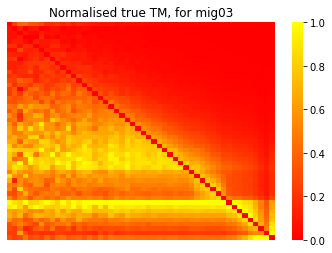

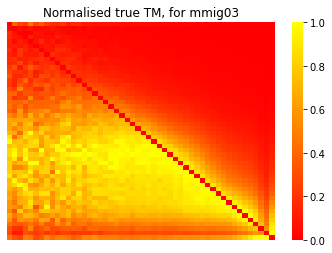

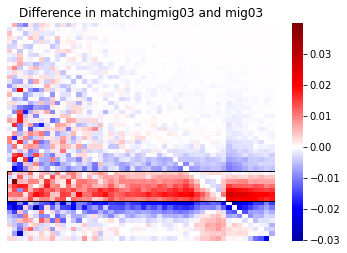

In [178]:
path_mig03 =  '/home/trevor/ancestry/coal_data/mig03/'
files_mig03 = os.listdir(path_mig03)
print('Files are:\m')
for i in range(len(files_mig03)):
    print(f'File {i} is {path_mig03 + files_mig03[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig03_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_mig03)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_mig03),files_mig03[i]))
    coal_data = np.loadtxt(path_mig03+files_mig03[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig03_tms = mig03_tms + tm
    print(f'sum of mig03_tms is {sum(mig03_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mig03 = normalise(mig03_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig03 = np.copy(tm_norm_mig03)
tm_nd_mig03[range(0,len(tm_nd_mig03)),range(0,len(tm_nd_mig03))] = 0
tm_nd_norm_mig03 = normalise(tm_nd_mig03,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig03,'colmax'),title='Normalised true TM, for mig03') # show heatmap

path_matchingmig03 =  '/home/trevor/ancestry/coal_data/matching_mig03/'
files_matchingmig03 = os.listdir(path_matchingmig03)
print('Files are:\m')
for i in range(len(files_matchingmig03)):
    print(f'File {i} is {path_matchingmig03 + files_matchingmig03[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mmig03_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_matchingmig03)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig03),files_matchingmig03[i]))
    coal_data = np.loadtxt(path_matchingmig03+files_matchingmig03[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mmig03_tms = mmig03_tms + tm
    print(f'sum of mmig03_tms is {sum(mmig03_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mmig03 = normalise(mmig03_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig03 = np.copy(tm_norm_mmig03)
tm_nd_mmig03[range(0,len(tm_nd_mmig03)),range(0,len(tm_nd_mmig03))] = 0
tm_nd_norm_mmig03 = normalise(tm_nd_mmig03,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig03,'colmax'),title='Normalised true TM, for mmig03') # show heatmap

def heatmaps_div2(matrix,title=''):
    cmaps = OrderedDict()
    cmaps['Diverging'] = [
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = sns.heatmap(matrix, cmap=cmaps['Diverging'][11], center=0,yticklabels=False, xticklabels=False)
    ax1.set_title(title)
    ax1.add_patch(Rectangle((0, 34), 50, 7, fill=False, edgecolor='black', lw=1))
    # for i in range(len(matrix)):
    #     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    # ax.set_title(plot_title)
    # ax.set_ylabel(ylabel='PSMC output')
    fig.show()
    # fig.savefig(heatmaps_path + sys.argv[4])
    return None

diff_mig03 = tm_nd_norm_mmig03 - tm_nd_norm_mig03
fig = heatmaps_div2(diff_mig03,title='Difference in matchingmig03 and mig03')
print(f'example values from the 20th column of this block are: {diff_mig03[33:41,20]}')
print(f'These correspond to the following values from the time intervals: {T_scaled_np[33:41]}') # this corresponds with the times at which structure occured

KL_divergence_mig03 = []
for i in range(N_T):
    KL_div = entropy(tm_nd_norm_mmig03[:,i],tm_nd_norm_mig03[:,i])
    KL_divergence_mig03.append(KL_div)

# find out the non inf elements
not_infs = np.where(np.array(KL_divergence_mig03)<1)
# print(not_infs)
print(f'\n\nmean KL divergence for mig03 and matchingmig03 is {np.mean(np.array(KL_divergence_mig03)[not_infs])}')
print(f'with {N_T - len(not_infs[0])} infs')
print('\nmedian KL_divergence is {}'.format(np.median(np.array(KL_divergence_mig03))))


## Mig04 and matching mig04

Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_145902.txt
File 1 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_150129.txt
File 2 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_150353.txt
File 3 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_150625.txt
File 4 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_150855.txt
File 5 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_151128.txt
File 6 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_151356.txt
File 7 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_151623.txt
File 8 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_151851.txt
File 9 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_struct0001_mig4_152122.txt
File 10 is /home/trevor/ancestry/coal_data/mig04/20201127_instant_s

sum of mig04_tms is [703911.  78248.  94545.  96072. 103827. 115783. 138374. 149762. 153657.
 181346. 192591. 211261. 226103. 237076. 263671. 291706. 308597. 334139.
 352891. 381366. 411467. 459244. 488577. 520157. 549273. 597164. 632671.
 656844. 678205. 713514. 732716. 751617. 761496. 763459. 556843. 507834.
 457286. 410991. 362089. 308239. 394213. 909747. 794094. 683617. 573100.
 465969. 371686. 282453. 207863. 382632.]
on iteration 14 of 20; file is 20201127_instant_struct0001_mig4_153343.txt
sum of mig04_tms is [741785.  83797.  99975. 101731. 111081. 123743. 147615. 159344. 164571.
 193580. 207337. 228177. 242598. 249889. 280133. 314020. 332267. 358158.
 381438. 406914. 445757. 489628. 524568. 558696. 585234. 638480. 678123.
 700150. 732689. 765520. 783466. 804100. 821019. 818397. 597528. 546114.
 490025. 440587. 387684. 330219. 423169. 974363. 850308. 733787. 615253.
 500852. 399434. 302863. 224608. 409211.]
on iteration 15 of 20; file is 20201127_instant_struct0001_mig4_153615.

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sum of mmig04_tms is [56588.  2638.  8551.  6275.  8941. 10323.  3709.  8560.  9829. 12289.
 13019. 16306. 15361. 13545. 17925. 18222. 18494. 25825. 27224. 24443.
 30585. 30353. 33542. 38959. 42324. 43775. 47715. 47563. 47407. 50391.
 52078. 44410. 49395. 46783. 46842. 46250. 41525. 43126. 41730. 41685.
 41623. 43459. 39916. 39278. 34284. 29930. 25391. 20102. 14677. 26834.]
on iteration 1 of 20; file is matching_mig04_095454.txt
sum of mmig04_tms is [ 88395.   6261.  12201.  12698.  17472.  17952.  11003.  17876.  20868.
  21802.  22258.  30373.  30742.  34516.  34529.  40209.  41338.  45584.
  52570.  53264.  59101.  62443.  66870.  77282.  83600.  88168.  96253.
  97765.  97005. 101571. 102733.  96175. 100253.  93915.  93781.  91595.
  87709.  85744.  82799.  84957.  85009.  86703.  80334.  78566.  68514.
  62811.  51259.  39987.  29570.  55615.]
on iteration 2 of 20; file is matching_mig04_095729.txt
sum of mmig04_tms is [140479.  10486.  15182.  16405.  24986.  24557.  18655.  2692

sum of mmig04_tms is [941447. 101596. 128627. 121608. 131402. 137931. 151808. 179015. 192959.
 218537. 233403. 246393. 284547. 306890. 344361. 369513. 380060. 427866.
 453102. 506233. 550435. 611911. 663957. 710052. 768508. 826841. 869267.
 908547. 945408. 939723. 951315. 923392. 935544. 886922. 883157. 854826.
 836694. 826205. 819374. 829209. 831564. 816869. 779970. 745246. 664432.
 585235. 483060. 382926. 290815. 521279.]
on iteration 19 of 20; file is matching_mig04_104251.txt
sum of mmig04_tms is [1018669.  107923.  135357.  125956.  140625.  146976.  160306.  191051.
  200946.  229750.  243127.  259904.  297966.  319150.  357819.  385362.
  397684.  453657.  480160.  529954.  580842.  644707.  698676.  750665.
  807599.  867912.  913834.  951959.  993201.  990402. 1004979.  970021.
  981714.  931275.  930369.  897758.  880621.  869606.  863442.  872877.
  874135.  859185.  821453.  784094.  697972.  615033.  506978.  402080.
  305888.  548361.]
example values from the 20th column 

/home/trevor/miniconda3/envs/ancestry/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


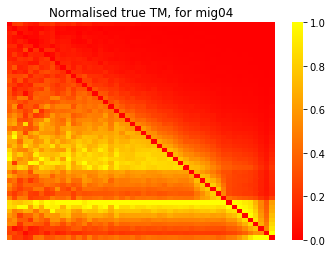

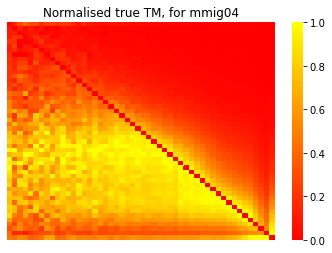

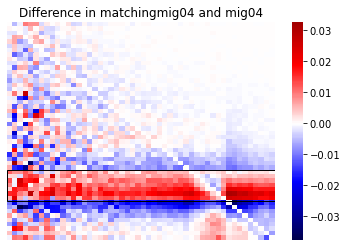

In [179]:
path_mig04 =  '/home/trevor/ancestry/coal_data/mig04/'
files_mig04 = os.listdir(path_mig04)
print('Files are:\m')
for i in range(len(files_mig04)):
    print(f'File {i} is {path_mig04 + files_mig04[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig04_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_mig04)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_mig04),files_mig04[i]))
    coal_data = np.loadtxt(path_mig04+files_mig04[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig04_tms = mig04_tms + tm
    print(f'sum of mig04_tms is {sum(mig04_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mig04 = normalise(mig04_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig04 = np.copy(tm_norm_mig04)
tm_nd_mig04[range(0,len(tm_nd_mig04)),range(0,len(tm_nd_mig04))] = 0
tm_nd_norm_mig04 = normalise(tm_nd_mig04,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig04,'colmax'),title='Normalised true TM, for mig04') # show heatmap

path_matchingmig04 =  '/home/trevor/ancestry/coal_data/matching_mig04/'
files_matchingmig04 = os.listdir(path_matchingmig04)
print('Files are:\m')
for i in range(len(files_matchingmig04)):
    print(f'File {i} is {path_matchingmig04 + files_matchingmig04[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mmig04_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_matchingmig04)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig04),files_matchingmig04[i]))
    coal_data = np.loadtxt(path_matchingmig04+files_matchingmig04[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mmig04_tms = mmig04_tms + tm
    print(f'sum of mmig04_tms is {sum(mmig04_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mmig04 = normalise(mmig04_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig04 = np.copy(tm_norm_mmig04)
tm_nd_mmig04[range(0,len(tm_nd_mmig04)),range(0,len(tm_nd_mmig04))] = 0
tm_nd_norm_mmig04 = normalise(tm_nd_mmig04,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig04,'colmax'),title='Normalised true TM, for mmig04') # show heatmap

def heatmaps_div2(matrix,title=''):
    cmaps = OrderedDict()
    cmaps['Diverging'] = [
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = sns.heatmap(matrix, cmap=cmaps['Diverging'][11], center=0,yticklabels=False, xticklabels=False)
    ax1.set_title(title)
    ax1.add_patch(Rectangle((0, 34), 50, 7, fill=False, edgecolor='black', lw=1))
    # for i in range(len(matrix)):
    #     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    # ax.set_title(plot_title)
    # ax.set_ylabel(ylabel='PSMC output')
    fig.show()
    # fig.savefig(heatmaps_path + sys.argv[4])
    return None

diff_mig04 = tm_nd_norm_mmig04 - tm_nd_norm_mig04
fig = heatmaps_div2(diff_mig04,title='Difference in matchingmig04 and mig04')
print(f'example values from the 20th column of this block are: {diff_mig04[33:41,20]}')
print(f'These correspond to the following values from the time intervals: {T_scaled_np[33:41]}') # this corresponds with the times at which structure occured

KL_divergence_mig04 = []
for i in range(N_T):
    KL_div = entropy(tm_nd_norm_mmig04[:,i],tm_nd_norm_mig04[:,i])
    KL_divergence_mig04.append(KL_div)

# find out the non inf elements
not_infs = np.where(np.array(KL_divergence_mig04)<1)
# print(not_infs)
print(f'\n\nmean KL divergence for mig04 and matchingmig04 is {np.mean(np.array(KL_divergence_mig04)[not_infs])}')
print(f'with {N_T - len(not_infs[0])} infs')
print('\nmedian KL_divergence is {}'.format(np.median(np.array(KL_divergence_mig04))))


## Mig05 and matchingmig05

Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_101533.txt
File 1 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_101902.txt
File 2 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_102228.txt
File 3 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_102551.txt
File 4 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_102915.txt
File 5 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_103238.txt
File 6 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_103559.txt
File 7 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_103926.txt
File 8 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_104244.txt
File 9 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_struct0001_mig5_104607.txt
File 10 is /home/trevor/ancestry/coal_data/mig05/20201128_instant_s

sum of mig05_tms is [775460.  79359.  87758.  88914. 105800. 108126. 122716. 144389. 164541.
 159674. 187463. 193109. 213090. 243209. 257943. 281815. 303471. 333165.
 357412. 384933. 430075. 470818. 484235. 525461. 546679. 591067. 617433.
 668975. 692160. 711853. 741022. 755238. 772943. 762246. 554352. 507967.
 466498. 415415. 360940. 308039. 390957. 898929. 794573. 674425. 570941.
 464763. 369319. 278341. 204273. 377702.]
on iteration 14 of 20; file is 20201128_instant_struct0001_mig5_110300.txt
sum of mig05_tms is [824688.  83169.  94989.  97255. 111401. 115670. 130378. 155069. 176164.
 171508. 198487. 207081. 229746. 258440. 276995. 303161. 325302. 356820.
 387262. 414982. 461230. 505435. 521316. 564509. 586751. 632357. 660314.
 716479. 739695. 763220. 793789. 808235. 828645. 814751. 595580. 544965.
 500301. 445648. 387561. 330249. 418735. 961118. 850262. 722160. 612384.
 497443. 396381. 298944. 218891. 404070.]
on iteration 15 of 20; file is 20201128_instant_struct0001_mig5_110623.

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


sum of mmig05_tms is [27247.  3442.  4447.  7352.  8773. 10988. 11710.  9688.  8106. 11346.
 11808. 18123. 12968. 15008. 16128. 16842. 19807. 20321. 22400. 28453.
 29878. 32028. 36838. 41014. 45071. 44857. 45306. 51334. 54284. 48292.
 49828. 49341. 49768. 46192. 44998. 43953. 45053. 43406. 44953. 44580.
 45246. 43586. 40491. 39731. 34746. 31872. 25824. 19928. 16087. 26557.]
on iteration 1 of 20; file is matching_mig05_095508.txt
sum of mmig05_tms is [ 53054.   8476.  11959.  16399.  17784.  21919.  21440.  20012.  17310.
  19725.  20663.  35222.  27847.  31562.  32018.  36303.  38057.  41021.
  45967.  55208.  59919.  65954.  71307.  81755.  87236.  90634.  93753.
 101794. 106825.  96969. 101369.  96390. 100460.  94943.  90718.  88490.
  88056.  88022.  89216.  87469.  87654.  86712.  80532.  78809.  71606.
  63271.  53385.  38981.  30986.  54837.]
on iteration 2 of 20; file is matching_mig05_095749.txt
sum of mmig05_tms is [ 94746.  14197.  17171.  21809.  23161.  29349.  26550.  2927

sum of mmig05_tms is [756727.  96364. 113392. 126937. 137361. 145472. 159382. 174670. 191156.
 212627. 232465. 256335. 274492. 286863. 321195. 352905. 380223. 425336.
 452567. 534860. 560354. 623698. 668817. 736987. 799686. 842584. 895188.
 933637. 957880. 961216. 975255. 937719. 953426. 886870. 879257. 846869.
 839781. 822046. 825044. 813491. 819611. 814038. 768646. 750484. 676673.
 590851. 499180. 384608. 290590. 514166.]
on iteration 19 of 20; file is matching_mig05_104555.txt
sum of mmig05_tms is [ 789886.   99980.  118678.  132217.  144567.  153534.  167342.  184105.
  201546.  220818.  245243.  267186.  293483.  300999.  337047.  374194.
  401587.  448668.  473792.  562306.  587880.  659961.  705351.  774157.
  839439.  889148.  944144.  982179. 1008594. 1011543. 1030943.  988320.
 1003661.  931247.  925007.  890533.  884498.  865731.  868893.  857226.
  863963.  858873.  809218.  790609.  712624.  622881.  525891.  404209.
  305961.  540118.]
example values from the 20th column 

/home/trevor/miniconda3/envs/ancestry/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


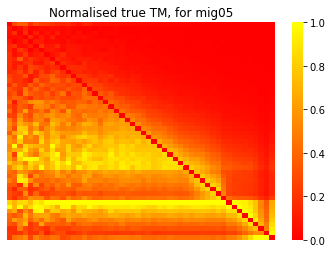

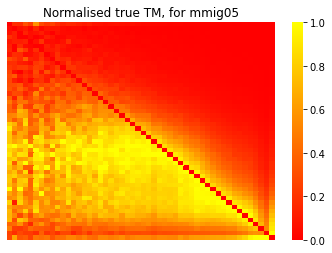

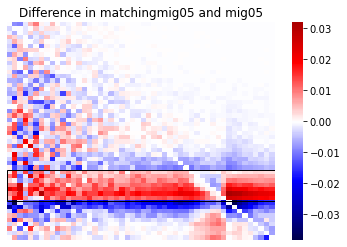

In [180]:
path_mig05 =  '/home/trevor/ancestry/coal_data/mig05/'
files_mig05 = os.listdir(path_mig05)
print('Files are:\m')
for i in range(len(files_mig05)):
    print(f'File {i} is {path_mig05 + files_mig05[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig05_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_mig05)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_mig05),files_mig05[i]))
    coal_data = np.loadtxt(path_mig05+files_mig05[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig05_tms = mig05_tms + tm
    print(f'sum of mig05_tms is {sum(mig05_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mig05 = normalise(mig05_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig05 = np.copy(tm_norm_mig05)
tm_nd_mig05[range(0,len(tm_nd_mig05)),range(0,len(tm_nd_mig05))] = 0
tm_nd_norm_mig05 = normalise(tm_nd_mig05,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig05,'colmax'),title='Normalised true TM, for mig05') # show heatmap

path_matchingmig05 =  '/home/trevor/ancestry/coal_data/matching_mig05/'
files_matchingmig05 = os.listdir(path_matchingmig05)
print('Files are:\m')
for i in range(len(files_matchingmig05)):
    print(f'File {i} is {path_matchingmig05 + files_matchingmig05[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mmig05_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files_matchingmig05)):
    print('on iteration {} of {}; file is {}'.format(i,len(files_matchingmig05),files_matchingmig05[i]))
    coal_data = np.loadtxt(path_matchingmig05+files_matchingmig05[i],comments="#")
    coal_times = round_bin_coal_data(seq_length,coal_data, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mmig05_tms = mmig05_tms + tm
    print(f'sum of mmig05_tms is {sum(mmig05_tms)}')
#     del tm, coal_data, coal_times, coal_times_intervals

tm_norm_mmig05 = normalise(mmig05_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig05 = np.copy(tm_norm_mmig05)
tm_nd_mmig05[range(0,len(tm_nd_mmig05)),range(0,len(tm_nd_mmig05))] = 0
tm_nd_norm_mmig05 = normalise(tm_nd_mmig05,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig05,'colmax'),title='Normalised true TM, for mmig05') # show heatmap

def heatmaps_div2(matrix,title=''):
    cmaps = OrderedDict()
    cmaps['Diverging'] = [
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax1 = sns.heatmap(matrix, cmap=cmaps['Diverging'][11], center=0,yticklabels=False, xticklabels=False)
    ax1.set_title(title)
    ax1.add_patch(Rectangle((0, 34), 50, 7, fill=False, edgecolor='black', lw=1))
    # for i in range(len(matrix)):
    #     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    # ax.set_title(plot_title)
    # ax.set_ylabel(ylabel='PSMC output')
    fig.show()
    # fig.savefig(heatmaps_path + sys.argv[4])
    return None

diff_mig05 = tm_nd_norm_mmig05 - tm_nd_norm_mig05
fig = heatmaps_div2(diff_mig05,title='Difference in matchingmig05 and mig05')
print(f'example values from the 20th column of this block are: {diff_mig05[33:41,20]}')
print(f'These correspond to the following values from the time intervals: {T_scaled_np[33:41]}') # this corresponds with the times at which structure occured

KL_divergence_mig05 = []
for i in range(N_T):
    KL_div = entropy(tm_nd_norm_mmig05[:,i],tm_nd_norm_mig05[:,i])
    KL_divergence_mig05.append(KL_div)

# find out the non inf elements
not_infs = np.where(np.array(KL_divergence_mig05)<1)
# print(not_infs)
print(f'\n\nmean KL divergence for mig05 and matchingmig05 is {np.mean(np.array(KL_divergence_mig05)[not_infs])}')
print(f'with {N_T - len(not_infs[0])} infs')
print('\nmedian KL_divergence is {}'.format(np.median(np.array(KL_divergence_mig05))))
